# Data clean up

The loan status column has the below values. We are interested in loans with the status values of 'Fully Paid' and 'Charged Off'.<br>
We will remove rows with loans that are current, Late, In Grace Period since we are only concerned with
the loans that were either fully paid or charged off and loans that are no longer current.

In [17]:
# The loan status column specifies the outcome or current status of the loan
data['loan_status'].value_counts()

Fully Paid                                             493262
Current                                                247233
Charged Off                                            125307
Late (31-120 days)                                       9822
In Grace Period                                          6575
Late (16-30 days)                                        2465
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    12
Name: loan_status, dtype: int64

In [18]:
# Any rows with loan status containing the string 'Does not meet the credit policy.' will be dropped
# We will also drop rows with loans that are current, Late, In Grace Period since we are only concerned with
# the loans that were either fully paid or charged off

data = data[data['loan_status'].isin(['Fully Paid','Charged Off'])]

In [19]:
data['loan_status'].value_counts()

Fully Paid     493262
Charged Off    125307
Name: loan_status, dtype: int64

In [20]:
# We should also transform this column into a categorical variable where the Status Fully Paid will be 1
# The status not Fully Paid (Charged Off) will be 0
data['loan_status_num'] = data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [21]:
data['loan_status_num'].value_counts()

1    493262
0    125307
Name: loan_status_num, dtype: int64

## Data Visualization

### EDA and Data Visualization on Overall Data

In this section we will look at the trend of the overall data:
    - Loan growth over the past few years
    - Fully Paid Loans vs Default Loans
    - Loans Issued across the different states

#### Number of loans issued over the past years.
Let's start with the number of loans over the past years.

Below we see the trend of the number of loans over the past years (2007-2016). The number of loans issued since 2007 is increasing very rapidly.

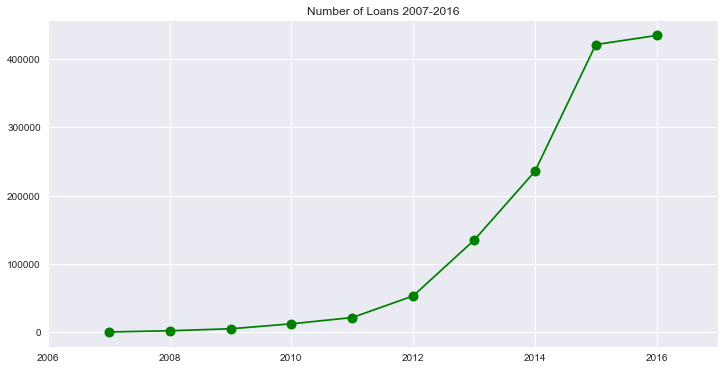

In [46]:
data2016['issue_d'].dt.year.value_counts().sort_index().plot(style = 'go-', ms = 10, figsize = (12,6),
                                                             xlim = (2006,2017), title = 'Number of Loans 2007-2016');

#### Fully Paid vs Default Loans

Let's look at the percentage of Fully paid loans vs Default Loans

In [49]:
pd.DataFrame(data['loan_status'].value_counts(normalize = True)*100)

,loan_status
Fully Paid,79.742403
Charged Off,20.257597


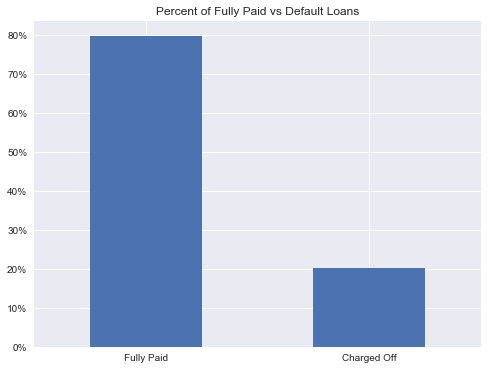

In [50]:
from matplotlib.ticker import FuncFormatter
ax = data['loan_status'].value_counts(normalize = True).plot(kind = 'bar', 
                                                              title = 'Percent of Fully Paid vs Default Loans',
figsize = (8,6), rot = 0);

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

Overall 79% of loans are fully paid. 

Let's look at the percentages per year

In [52]:
data['loan_status'].groupby(data['issue_d'].dt.year).value_counts(normalize = True).unstack()

loan_status,Charged Off,Fully Paid
issue_d,,
2007,0.179283,0.820717
2008,0.158131,0.841869
2009,0.125954,0.874046
2010,0.128901,0.871099
2011,0.151796,0.848204
2012,0.162912,0.837088
2013,0.161293,0.838707
2014,0.189144,0.810856
2015,0.263405,0.736595


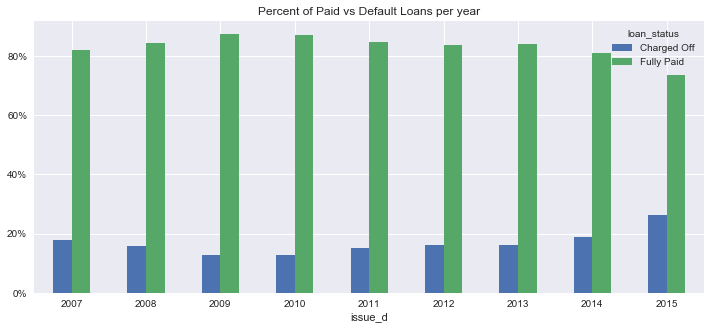

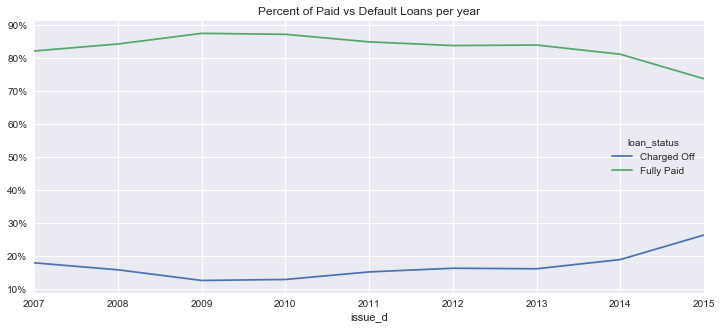

In [53]:
bx = data['loan_status'].groupby(data['issue_d'].dt.year).value_counts(normalize = True).unstack().plot(kind = 'bar',
                            figsize = (12,5), rot = 0, title = 'Percent of Paid vs Default Loans per year');

bx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

cx = data['loan_status'].groupby(data['issue_d'].dt.year).value_counts(normalize = True).unstack().plot(kind = 'line',
                            figsize = (12,5), rot = 0, title = 'Percent of Paid vs Default Loans per year');

cx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

The repayment rate is almost always over 80% every year.

#### Loans across the different states

Below we look at the repayment rate by state. First let's look at the number of issued loans by state.<br> We can see that some states have very few issued loans, so we can't really compare the repayment rates between states.

In [279]:
data['loan_status'].groupby(data['addr_state']).value_counts().unstack().sort_values('Fully Paid').head(10)

loan_status,Charged Off,Fully Paid
addr_state,,
IA,1,6
ID,1,8
ND,51,141
ME,32,148
NE,169,371
VT,175,985
SD,295,997
WY,243,1184
AK,320,1308


In [280]:
data['loan_status'].groupby(data['addr_state']).value_counts(normalize = True).unstack().sort_values('Fully Paid').head(10)

loan_status,Charged Off,Fully Paid
addr_state,,
NE,0.312963,0.687037
MS,0.285307,0.714693
ND,0.265625,0.734375
AL,0.245562,0.754438
OK,0.240855,0.759145
TN,0.236505,0.763495
AR,0.235938,0.764062
NV,0.234289,0.765711
LA,0.230642,0.769358


The repayment rate varies from 68% in Nebraska to 88% in Idaho. With Idaho having less than 10 loans issued over the past 10 years, and Nebraska having around 500 loans issued, we can't really compare their repayment rate.<br>
Also, states like Texas, New York, and California have more than 35,000 issued loans over the past 10 years, with a repayment rate of around 80%. <br>
Given the variation of the loan volume across the different states, we will not compare the loan repayment based on the state.

In [57]:
df = pd.DataFrame(data['addr_state'].value_counts(dropna = False))

In [258]:
import plotly 
plotly.tools.set_credentials_file(username='sarahb0789', api_key='t0QTAWDQLgrYa4KAYslb')

In [259]:
import plotly.plotly as py

In [260]:
scl = [[0.0, 'rgb(255,255,255)'],[0.2, 'rgb(255,229,204)'],[0.4, 'rgb(255,204,153)'],
            [0.6, 'rgb(255,178,102)'],[0.8, 'rgb(255,128,0)'],[1.0, 'rgb(204,102,0)']]
#rgb(255,204,153)

mapdata = [ dict(
        type='choropleth', locationmode = 'USA-states', locations = df.index,
        z = df['addr_state'].astype(float), colorscale = scl,
        autocolorscale = False, hoverinfo = 'all',
        marker = dict(
            line = dict (color = 'rgb(0,0,0)', width = 1)),
        colorbar = dict(
            title = "Number of Loans",
            xanchor = 'right', ticks = 'inside', nticks = 6, ticklen = 30, tickwidth = 3))];


layout = dict(title = '2007-2016 Number of Issued Loans by State',
        geo = dict(scope='usa', projection=dict(type='albers usa' )))
    
fig = dict( data=mapdata, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sarahb0789/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


### EDA and Data Visualization on Specific Variables

In this section, we will look at the relationship between some of the variables as well as their relationship with the loan status (whether there is a relationship between the variable and a loan being fully paid).

#### Grade vs SubGrade Variable

Let's look at the relationship between the Lending Club Assigned Grade and the Loan Status
The loan status can be either 0 for Charged Off or 1 for Fully Paid (Updated above during data clean up)
Let's look at the percentage of loans in each category by grade

In [261]:
# The percent of paid loans vs Default loans by grade. 
(data['loan_status'].groupby(data['grade']).value_counts(normalize = True)*100).unstack()

loan_status,Charged Off,Fully Paid
grade,,
A,6.448177,93.551823
B,13.176307,86.823693
C,22.331030,77.668970
D,30.124823,69.875177
E,38.645394,61.354606
F,44.064527,55.935473
G,48.931001,51.068999


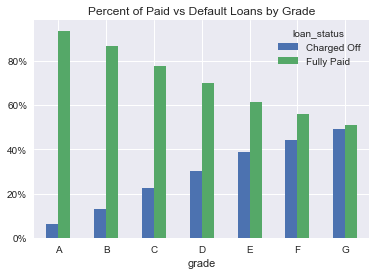

In [63]:
# Let's visualize the above percentages
dx = data['loan_status'].groupby(data['grade']).value_counts(normalize = True).unstack().plot(kind = 'bar' ,
                                            rot = 0, title = 'Percent of Paid vs Default Loans by Grade');
dx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

Looking at the plot above, we can see that there is a relationship between grade and loan payment. <br>
Loans with higher grades have a higher full repayment rate. <br>
As the grade decreases from A to G, the loan repayment rate decreases<br>
As the grade decreases from A to G, the loan default rate increses i.e. Applicants with lower grades tend to default more

Next we'll look at the subgrade. The subgrade is basically a more divided category than the grade.

In [65]:
# The percent of paid loans vs Default loans by subgrade. 
(data['loan_status'].groupby(data['sub_grade']).value_counts(normalize = True)*100).unstack().head(20)

loan_status,Charged Off,Fully Paid
sub_grade,,
A1,3.170331,96.829669
A2,4.862216,95.137784
A3,5.589080,94.410920
A4,7.080237,92.919763
A5,8.836922,91.163078
B1,10.271443,89.728557
B2,11.357848,88.642152
B3,12.796824,87.203176
B4,14.519299,85.480701


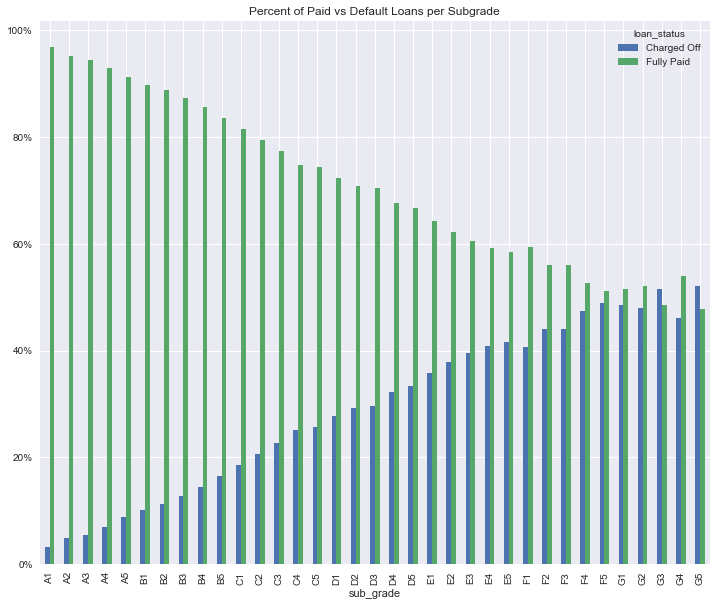

In [66]:
# Full Payment rate - Bar plot of the payment vs default rate by subgrade
ex = data['loan_status'].groupby(data['sub_grade']).value_counts(normalize = True).unstack().plot(kind = 'bar', 
                                figsize = (12,10), title = 'Percent of Paid vs Default Loans per Subgrade');
ex.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

Looking at the plot above, we can see that there is a difference between the subgrades. <br>
As the subgrade decreases, the full repayment rate also decreases <br>
The difference is about a 1% drop per subgrade.

#### Employment History Variable

Borrowers with a full-time job, and guaranteed monthly income may be more reliable than borrowers with no income or no job. Let's look at the relationship between emplpyment history vs Loan Payment

The first column we can use for employment history is the employment length column<br>
As part of the data cleanup this field was updated as follow:<br>
        10+ years = 10, 9 years = 9, ..., 1 year = 1, <1 year: 0, n/a: 0

In [67]:
data['loan_status'].groupby(data['emp_length']).value_counts(normalize = True).unstack()

loan_status,Charged Off,Fully Paid
emp_length,,
0,0.275379,0.724621
1,0.209275,0.790725
2,0.204555,0.795445
3,0.197275,0.802725
4,0.199222,0.800778
5,0.198174,0.801826
6,0.196050,0.803950
7,0.196547,0.803453
8,0.199180,0.800820


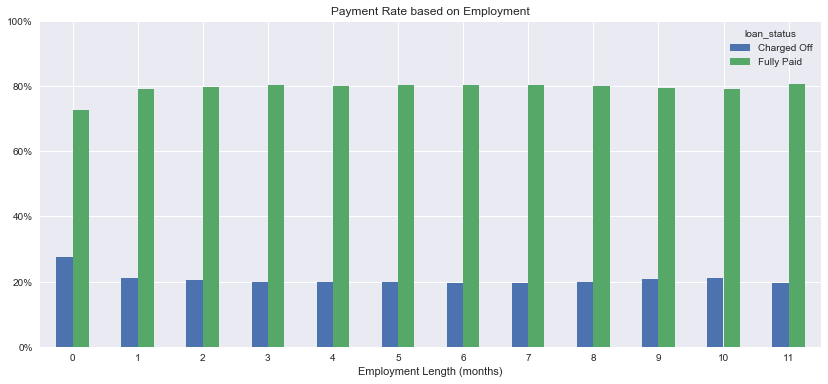

In [68]:
fx = data['loan_status'].groupby(data['emp_length']).value_counts(normalize = True).unstack().plot(kind = 'bar',
                                figsize = (14,6), title = 'Payment Rate based on Employment', ylim = (0,1), rot = 0);
fx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
fx.set_xlabel('Employment Length (months)');

In [69]:
# There is not much difference between in the repayment rate for any employment length greater than or equal to 1
# Let's add a column to separate the employment length to 0 for n/a (no employment) and 1 for employed (any lenghth)
data['emp_length_updated'] = np.where(data['emp_length'] == 0, 0, 1)
data['loan_status'].groupby(data['emp_length_updated']).value_counts(normalize = True).unstack()

loan_status,Charged Off,Fully Paid
emp_length_updated,,
0,0.275379,0.724621
1,0.198902,0.801098


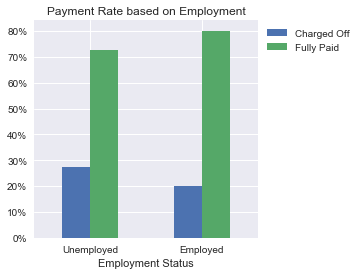

In [70]:
gx = data['loan_status'].groupby(data['emp_length_updated']).value_counts(normalize = True).unstack().plot(kind = 'bar',
                                figsize = (4,4), title = 'Payment Rate based on Employment',  rot = 0);
gx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
gx.set_xlabel('Employment Status');
plt.xticks([0,1],['Unemployed','Employed']);
plt.legend(bbox_to_anchor=(1.0, 1.0));

Looking at the data and plots above, the Payment rate seems to be lower for no employment, but is around the same for any employement length from less than 1 year to 10 or more.  <br>

The rate of repayment is around 80% for employment lengths of less than 1 year or more (i.e if the borrower is employed).<br>
The rate of repayment is 8% lower for no employment.<br>


#### Delinquent Accounts

Borrowers with current unsettled debts, unpaid accounts, or other unpaid loans will appear riskier than borrowers with no unsettled debts. Using the Lending Club data, we can determine the relationship between delinquent accounts, and the likelihood of a loan to be repaid in full and on time.

We will look at the columns:
- acc_now_delinq : The number of accounts on which the borrower is now delinquent.
- mths_since_last_delinq: The number of months since the borrower's last delinquency.

##### Column acc_now_delinq

Let's look at the relationship between delinquent accounts and loan repayment.

In [73]:
data['acc_now_delinq'].value_counts()
# It looks like the majority of borrowers do not have delinquent accounts

0.0    616005
1.0      2406
2.0       126
3.0        17
4.0         6
5.0         2
6.0         1
Name: acc_now_delinq, dtype: int64

Let's look at the data as follow instead:<br>
Loan with 0 delinquent account vs loan with 1 or more delinquent account

In [74]:
# Let's add a column for delinq_acc as 0 for no delinquent account or 1 for 1 or more delinquent accounts
# Let's then see the relationship between loan repayment and delinquent accounts

In [75]:
data['delinq_acc'] = data['acc_now_delinq'].map({0.0:'0', 1.0:'1+', 2.0:'1+', 3.0:'1+', 4.0:'1+', 5.0:'1+', 6.0:'1+'})

In [76]:
data['loan_status'].groupby(data['delinq_acc']).value_counts(normalize = True).unstack()

loan_status,Charged Off,Fully Paid
delinq_acc,,
0,0.202393,0.797607
1+,0.246677,0.753323


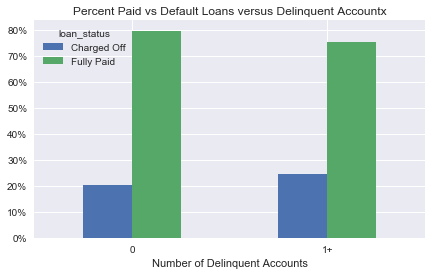

In [77]:
ix = data['loan_status'].groupby(data['delinq_acc']).value_counts(normalize = True).unstack().plot(kind = 'bar', 
                    figsize = (7,4), title = 'Percent Paid vs Default Loans versus Delinquent Accountx', rot = 0);
ix.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ix.set_xlabel('Number of Delinquent Accounts');

We can see that the repayment rate drops by almost 5% when there is 1 or more delinquent accounts. <br>
The difference is not a significant difference.

##### Column mths_since_last_delinq

In [88]:
data['mths_since_last_delinq'].head()

35836      NaN
95665     41.0
31601     64.0
34158     58.0
159966    26.0
Name: mths_since_last_delinq, dtype: float64

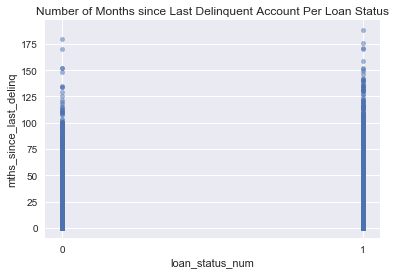

In [89]:
# Range of the Number of Months Since last Delinquent Account for Paid vs Default Loans
ox = data[['mths_since_last_delinq','loan_status_num']].sort_values('mths_since_last_delinq').plot.scatter(
    x = 'loan_status_num', y = 'mths_since_last_delinq', xticks = [0,1], alpha = 0.5,
    title = 'Number of Months since Last Delinquent Account Per Loan Status');

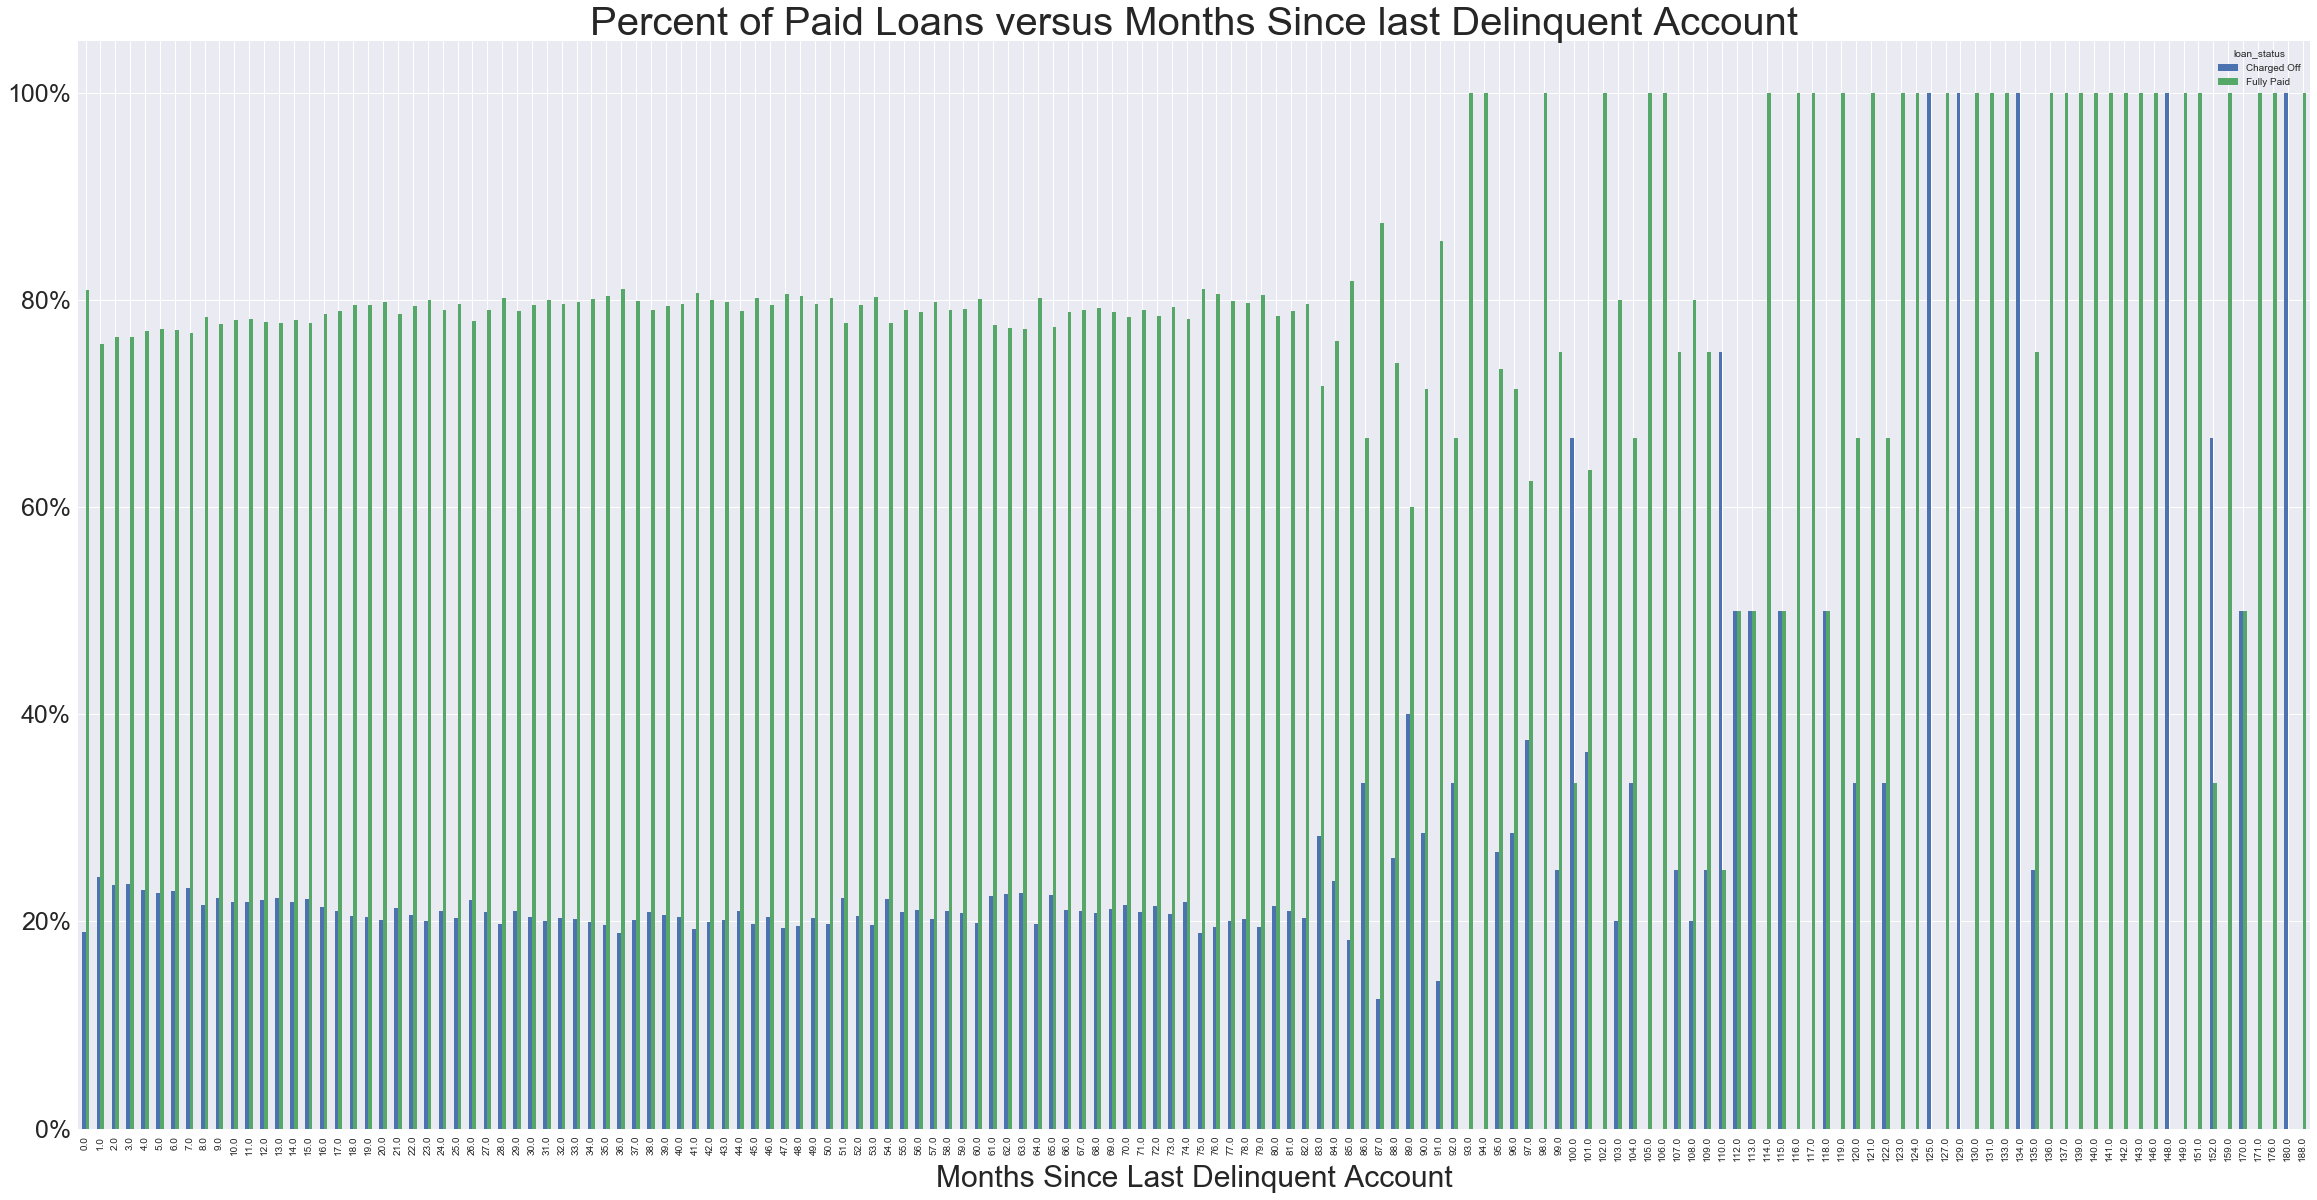

In [90]:
# Let's look at the relationship between months since last delinquent account and loan repayment
# Percent of loan borrowers with delinquent accounts
# We are using the percentage
px = data['loan_status'].groupby(data['mths_since_last_delinq']).value_counts(normalize = True).unstack().plot(
    kind = 'bar', figsize=(40,20));

px.set_title('Percent of Paid Loans versus Months Since last Delinquent Account',fontsize= 40) # title of plot

px.set_xlabel('Months Since Last Delinquent Account',fontsize = 30) #xlabel
plt.yticks(fontsize=25)
px.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) ;

It looks like the repayment rate is aroun 80% whether the last delinquent account was less than a month ago or more than 10, 20, 30+ months

#### Debt to Income Ratio

The debt to income ratio is the part of a borrower’s income used towards current debt such as mortgage, rent and credit cards. If a borrower’s debt-to-income ratio is high, then a large part of his income is currently going toward paying current debts. If a borrower is already using a large part of his income to pay current debts, then that might impact his ability to pay an additional loan. 

In [93]:
# Let's look at the relationship between debt to income ratio and loan repayment
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,125306.0,19.696533,8.404940,0.0,13.49,19.49,25.76,67.50
Fully Paid,493257.0,17.090818,8.008968,0.0,11.12,16.62,22.63,380.53


(-1, 50)

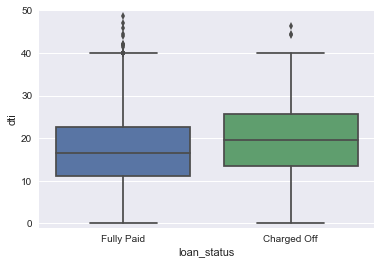

In [95]:
# Let's look at the range of debt to income ratio groupe by loan status (Paid vs Default)
sns.boxplot(x = 'loan_status', y = 'dti', data = data)
plt.ylim(-1, 50)

Based on the above data, and plots: we can see that loans that are charged off have a slightly higher debt to income ratio than loans that are fully paid.


#### Anual Income

In this section we will look at the relationship between income and loan repayment.<br>
Are higher income borrowers more reliable than lower income borrowers?

In [100]:
# Let's look at the relationship between annual income and loan payment
# Let's first look at the income range
data['annual_inc'].describe()[3:]

min       3000.0
25%      45000.0
50%      63300.0
75%      90000.0
max    8900060.0
Name: annual_inc, dtype: float64

In [102]:
# Let's break down the income amounts by ranges
data['annual_inc_range'] = data['inc_updated'].apply(lambda x:
                                                        30000 if x < 30000 else (
                                                        52000 if x < 52000 else (
                                                        75000 if x < 75000 else (
                                                        100000 if x < 100000 else (
                                                        150000 if x < 150000 else (
                                                        10000000))))))

In [103]:
(data.groupby(['grade','annual_inc_range'])['loan_status'].value_counts(normalize = True)).unstack()

loan_status             Charged Off  Fully Paid
grade annual_inc_range                         
A     30000                0.109828    0.890172
      52000                0.083517    0.916483
      75000                0.064673    0.935327
      100000               0.057544    0.942456
      150000               0.050445    0.949555
      10000000             0.048594    0.951406
B     30000                0.179540    0.820460
      52000                0.147291    0.852709
      75000                0.129985    0.870015
      100000               0.118936    0.881064
      150000               0.109443    0.890557
      10000000             0.110653    0.889347
C     30000                0.260146    0.739854
      52000                0.244999    0.755001
      75000                0.226697    0.773303
      100000               0.204605    0.795395
      150000               0.183874    0.816126
      10000000             0.175316    0.824684
D     30000                0.319507    0.680493
      52000                0.325429    0.674571
      75000                0.309160    0.690840
      100000               0.280609    0.719391
      150000               0.257660    0.742340
      10000000             0.234975    0.765025
E     30000                0.381279    0.618721
      52000                0.418825    0.581175
      75000                0.411435    0.588565
      100000               0.361934    0.638066
      150000               0.331218    0.668782
      10000000             0.298008    0.701992
F     30000                0.432034    0.567966
      52000                0.480000    0.520000
      75000                0.464972    0.535028
      100000               0.417479    0.582521
      150000               0.377569    0.622431
      10000000             0.364435    0.635565
G     30000                0.564286    0.435714
      52000                0.528934    0.471066
      75000                0.506383    0.493617
      100000               0.514874    0.485126
      150000               0.409509    0.590491
      10000000             0.351724    0.648276

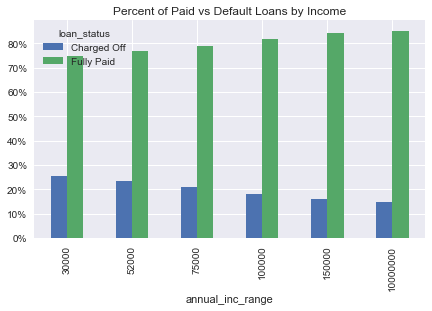

In [104]:
qx = data['loan_status'].groupby(data['annual_inc_range']).value_counts(normalize = True).unstack().plot(
    kind = 'bar', figsize = (7,4), title = 'Percent of Paid vs Default Loans by Income');
qx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) ;

Looking at the above analysis, the higher the annual income, the greater the percentage of fully paid loans.<br>
When the income increases, the payment rate also increases<br>
When the income increases, the default rate seems to decrease<br>
So, borrowers with higher income tend to repay their loans at a higher rate than borrowers with lower income.

#### Home Ownership Status

In this section, we will determine whether home ownership affects the likelihood of a borrower to pay loans

In [105]:
data['home_ownership'].value_counts()

MORTGAGE    307976
RENT        251645
OWN          58755
OTHER          143
NONE            43
ANY              1
Name: home_ownership, dtype: int64

In [106]:
# Let's group Other and Any into a single Group OTHER
data['home_ownership_group'] = data['home_ownership'].map({
    'MORTGAGE':'MORTGAGE','RENT':'RENT','OWN':'OWN','OTHER':'OTHER','NONE':'NONE','ANY':'OTHER'
})

In [108]:
(data['loan_status'].groupby(data['home_ownership_group']).value_counts(normalize = True)*100).unstack()

loan_status,Charged Off,Fully Paid
home_ownership_group,,
MORTGAGE,17.713069,82.286931
NONE,16.279070,83.720930
OTHER,18.750000,81.250000
OWN,21.436473,78.563527
RENT,23.098015,76.901985


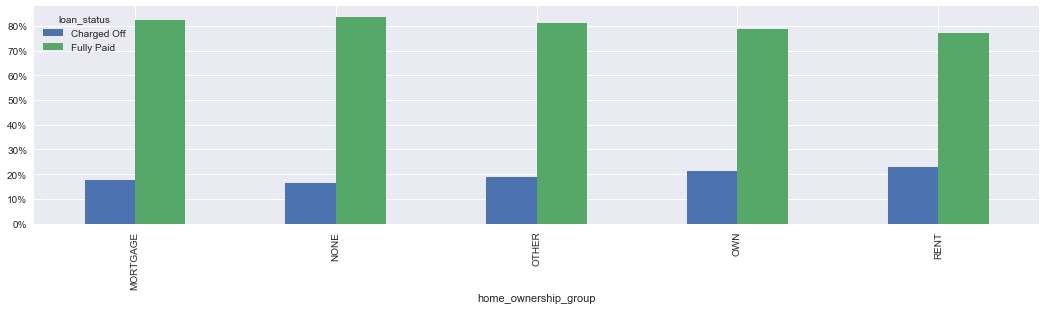

In [110]:
rx = data['loan_status'].groupby(data['home_ownership_group']).value_counts(normalize = True).unstack().plot(
    kind = 'bar', figsize = (18,4));
rx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) ;

It looks like borrowers who rent have the lowest full repayment rate at 76% compared to borrowers who have a mortgage at 82%

#### Loan Amount

In this section we will determine if there is any relationship between the loan amount and the repayment rate<br>
The variable that we will use is the funded amount which is the total amount commited to the loan<br>
This could be equal to or lower than the amount requested by the borrower<br>

In [111]:
data['funded_amnt'].describe()[[1,3,4,5,6,7]]

mean    14205.10041
min       500.00000
25%      8000.00000
50%     12000.00000
75%     20000.00000
max     35000.00000
Name: funded_amnt, dtype: float64

In [112]:
# Let's break down the amounts by ranges
data['funded_range'] = data['funded_amnt'].apply(lambda x:
                                                    15000 if x <= 15000 else (
                                                    25000 if x <= 25000 else (
                                                    35000)))

In [114]:
data['loan_status'].groupby(data['funded_range']).value_counts(normalize = True).unstack()

loan_status,Charged Off,Fully Paid
funded_range,,
15000,0.184359,0.815641
25000,0.230110,0.769890
35000,0.242585,0.757415


We can see that the higher the loan amount, the lower the repayment rate, however the difference is not too significant.

#### Other Open Accounts and Credit Lines

In this section we will determine if there is a relationship between the number of open accounts or credit lines and the Repayment Rate

We will look at the following variables:
    open_acc : number of open credit lines
    open_acc_6m : number of open credit lines in the past 6 months
    open_il_12m: number of installment accounts in the past 12 months
    open_rv_12m: number of revolving trades opened in past 12 months

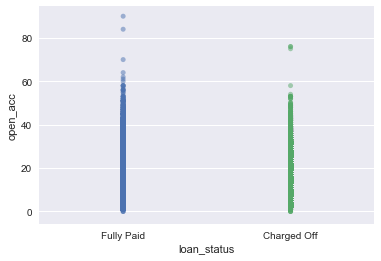

In [127]:
# Let's plot the number of open accounts by loan status
sns.stripplot(x = 'loan_status', y = 'open_acc', data = data, alpha = 0.5);


There is almost no correlation existing between the number of open accounts and loan repayment

#### Loan Term

In this section we answern the following question:<br>
    are longer term loans safer than shorter term ones?

In [129]:
(data['loan_status'].groupby(data['term']).value_counts(normalize = True)*100).unstack()

loan_status,Charged Off,Fully Paid
term,,
36 months,15.866737,84.133263
60 months,34.110266,65.889734


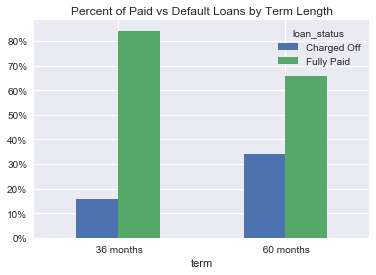

In [130]:
vx = data['loan_status'].groupby(data['term']).value_counts(normalize = True).unstack().plot(kind = 'bar',
                                        title = 'Percent of Paid vs Default Loans by Term Length', rot = 0);
vx.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) ;

It looks like longer term loans are riskier than shorter loans.<br>

(0, 50)

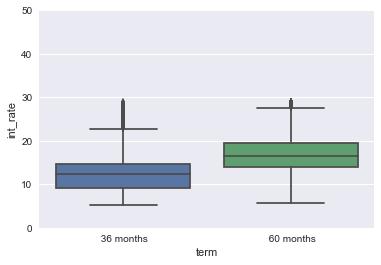

In [132]:
# Let's look at the interest rate and loan term
sns.boxplot(x = 'term', y = 'int_rate', data = data)
plt.ylim(0, 50)

Longer term loans have higher interest rates than shorter term loans<br>
This might be why longer term loans have a lower repayment rate than shorter term loans<br>

#### Interest Rate

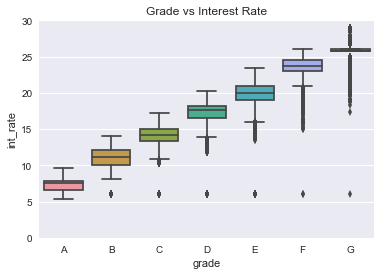

In [134]:
# Let's look at interest rate by grade
sns.boxplot(x = 'grade', y = 'int_rate', data = data.sort_values('grade'))
plt.ylim(0, 30)
plt.title('Grade vs Interest Rate')

The lower the grade, the higher the interest rate.

Below, we look at the interest rate by grade with the interest rate grouped by Loan Status. This is to see if Default Loans have higher interest rates by grade.

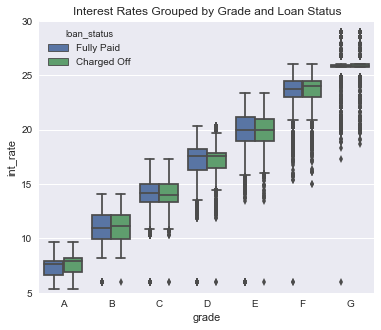

In [135]:
# Interest rates grouped by grade and loan status
fig, ax = plt.subplots()
fig.set_size_inches(6, 5)
sns.boxplot(x = 'grade', y = 'int_rate', hue = 'loan_status', data = data.sort_values('grade'), ax = ax)
plt.ylim(5, 30)
plt.title( 'Interest Rates Grouped by Grade and Loan Status');

Apart for grade A, there is not much difference interest rates for Paid vs Default Loans

#### Loan Term

Below, we look at the relationship between loan term and loan repayment.

In [136]:
(data.groupby(['grade','term'])['loan_status'].value_counts(normalize = True)*100).unstack()

loan_status       Charged Off  Fully Paid
grade term                               
A      36 months     6.385088   93.614912
       60 months     9.216193   90.783807
B      36 months    12.485114   87.514886
       60 months    18.826691   81.173309
C      36 months    20.224246   79.775754
       60 months    28.376808   71.623192
D      36 months    25.890257   74.109743
       60 months    37.366122   62.633878
E      36 months    31.597302   68.402698
       60 months    42.644006   57.355994
F      36 months    34.531416   65.468584
       60 months    46.746050   53.253950
G      36 months    43.488372   56.511628
       60 months    49.565925   50.434075

Below plot shows the percent of repaid loans by loan term. It is visible that the longer loan term of 60 months has a lower repayment rate than the shoter loan term of 36 months.

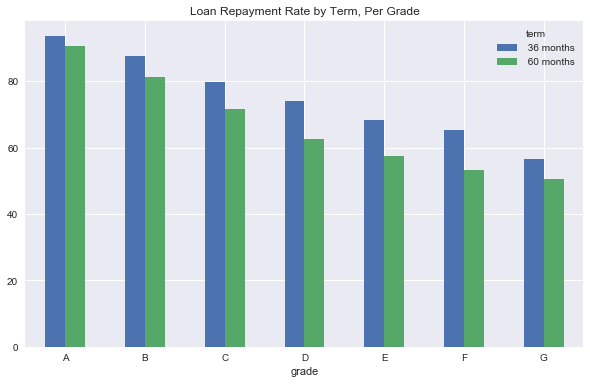

In [137]:
a = (data.groupby(['grade','term'])['loan_status'].value_counts(normalize = True)*100).unstack()
a['Fully Paid'].unstack().plot(kind = 'bar', figsize = (10,6), rot = 0, title = 'Loan Repayment Rate by Term, Per Grade')

Below plot shows both the Repayment and Default rates for each grade, term.

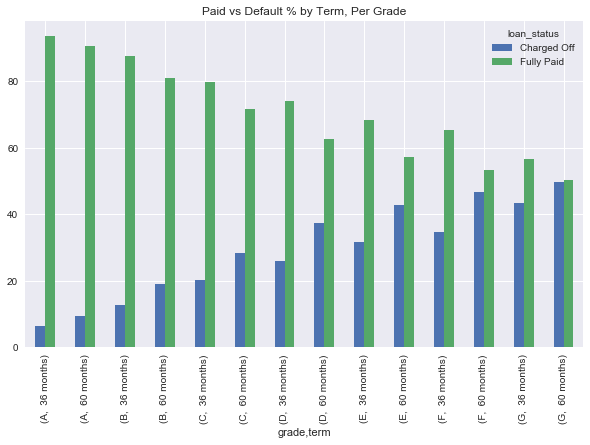

In [138]:
wx = (data.groupby(['grade','term'])['loan_status'].value_counts(normalize = True)*100).unstack().plot(
    kind = 'bar', figsize = (10,6), title = 'Paid vs Default % by Term, Per Grade')

We can see that longer term loans have a lower repayment rate by grade than shorter term loans.<br>
Also, we notice that grade G loans have about a 50-50 chance of getting paid or charged off when the loan term is 60 months.

## Data Modeling

In this section, we will build a model that will help us predict if a loan will be fully repaid by the end of the loan term. This is to determine how safe it is for an investor to borrow his money. <br>
Logistic Regression<br>

We selected the best model based on Train Test Split and Cross Validation.<br>

Variables used for the following linear regression:<br>
<br>
•	Grade<br>
•	Employment Status (Employed vs Unemployed)<br>
•	Loan Term (36-month vs 60-month)<br>
•	Debt to Income Ratio (The debt to income ratio is the part of a borrower’s income used towards current debt such as mortgage, rent and credit cards. If a borrower’s debt-to-income ratio is high, then a large part of his income is currently going toward paying current debts. If a borrower is already using a large part of his income to pay current debts, then that might impact his ability to pay an additional loan)<br>
•	Home ownership status (Mortgage, Own, Rent or None)<br>
•	Loan Purpose<br>
•	Annual Income <br>
•	Ratio of Loan Installment to Monthly Income (This represents the ratio of the monthly income used toward paying the loan installment every month. If a very large amount of the monthly income is used, analysis shows that the borrower will have difficulty paying back the loan)<br>



#### Additional Data Prep

In the following section, we will clean up and prep any columns that were not prepped during the first part of the project. This will mostly include transforming categorical columns into dummy variales so we can use them for logistic regression.

#### Variable Grade<br>

We will update the grade into an ordered categorical value as follow:<br>
A:7 > B:6 > C:5 > D:4 > E:3 > F:2 > G:1

In [141]:
data['grade_num'] = data['grade'].map({
    'A':7, 'B':6, 'C':5, 'D':4, 'E':3, 'F':2, 'G':1
})

#### Employment Length

Employment Length<br>
We will classify the Employment Length into two values:<br>
0 for not employed, and 1 for employed (i.e. any employment length)

In [147]:
data['employed'] = pd.get_dummies(data['emp_length_updated'], drop_first = True)

#### Debt to Income Ratio

Debt to Income Ratio will be broken by ranges:<br>
(0,10), (10,20), (20,30), and (30, 30+).<br>

<br>
The debt to income ratio column will then be converted into dummy variables.

In [148]:
data['dti_range'] = data['dti'].apply(lambda x:
                                                    10 if x < 10 else (
                                                        20 if x < 20 else (
                                                        30 if x < 30 else (
                                                        '30 +'))))

In [150]:
dti_dummies = pd.get_dummies(data['dti_range'], prefix = 'dti', drop_first = True)

In [262]:
dti_dummies.head(2)

,dti_20,dti_30,dti_30 +
35836,1,0,0
95665,1,0,0


#### Annual Income

The annual income column is converted into dummy variables.

In [151]:
inc_dummies = pd.get_dummies(data['annual_inc_range'], prefix = 'income')

In [152]:
inc_dummies.drop('income_10000000', axis = 1, inplace = True)

In [153]:
inc_dummies.head()

,income_30000,income_52000,income_75000,income_100000,income_150000
35836,0,0,0,1,0
95665,0,0,1,0,0
31601,0,0,1,0,0
34158,0,1,0,0,0
159966,0,0,1,0,0


#### Home Ownership Status

Home Ownership column is converted into dummy variables.

In [154]:
home_dummies = pd.get_dummies(data['home_ownership_group'], prefix = 'home')

In [155]:
home_dummies.drop('home_NONE', axis = 1, inplace = True)
home_dummies.drop('home_OTHER', axis = 1, inplace = True)

In [263]:
home_dummies.head(2)

,home_MORTGAGE,home_OWN,home_RENT
35836,0,0,1
95665,0,0,1


#### Loan Term

Loan Term<br>
The loan term will be converted in a categorical value as follow:<br>
36-month term vs 60-month term

In [159]:
data['term_60'] = pd.get_dummies(data['term'], drop_first = True)

#### Purpose

Purpose column is converted into dummy variables.

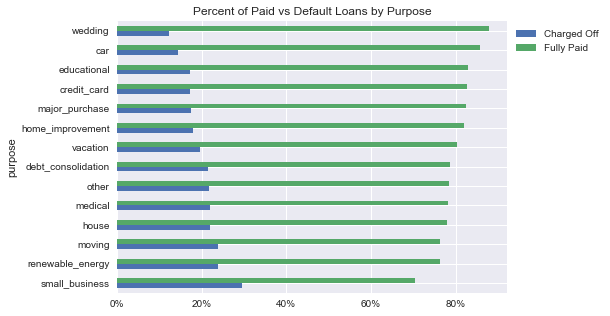

In [163]:
df10 = data['loan_status'].groupby(data['purpose']).value_counts(normalize = True).unstack().sort_values('Fully Paid').plot(kind = 'barh',
                                        title = 'Percent of Paid vs Default Loans by Purpose', rot =0,
                                        figsize = (7,5));
df10.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) ;
plt.legend(bbox_to_anchor=(1.0, 1.0));
                                                        


In [164]:
purpose_dummies = pd.get_dummies(data['purpose'], prefix = 'purpose', drop_first = True)

In [265]:
purpose_dummies.head(2)

,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
35836,0,1,0,0,0,0,0,0,0,0,0,0,0
95665,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Installment to Monthly Income Ratio

In [165]:
data['monthly_ratio'] = (data['installment']/(data['annual_inc']/12))*100

In [166]:
data['monthly_ratio_range'] = data['monthly_ratio'].apply(lambda x:
                                                    5 if x < 5 else (
                                                    10 if x < 10 else (
                                                        20)))

In [167]:
monthly_ratio_dummies = pd.get_dummies(data['monthly_ratio_range'], prefix = 'monthly_ratio', drop_first= True)

In [266]:
monthly_ratio_dummies.head(2)

,monthly_ratio_10,monthly_ratio_20
35836,0,1
95665,0,1


#### Logistic Regression - MODEL 5
#### With grade as a categorical variable

In [188]:
# Add all columns chosen for the model
datax = pd.concat([data[['grade_num','employed','term_60']],
                   dti_dummies, home_dummies, inc_dummies, 
                   purpose_dummies, monthly_ratio_dummies, data['loan_status_num']], axis = 1)

In [211]:
# Add grade as dummy variables
datax = pd.concat([datax, pd.get_dummies(datax['grade_num'], prefix = 'grade', drop_first = True)], axis = 1)

In [214]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X = datax.drop(['grade_num','loan_status_num'], axis = 1)
y = datax['loan_status_num']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print logreg.score(X_test, y_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

0.800602686222


In [276]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=logreg.predict(X_test))

array([[  2116,  29216],
       [  1619, 121690]])

In [215]:
y_base = []
for n in enumerate(y_pred):
    y_base.append(1)

In [216]:
from sklearn import metrics

print metrics.accuracy_score(y_test, y_base)

0.797388790812


In [218]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_base)

array([[     0,  31332],
       [     0, 123309]])

In [278]:
#Grade A
p = logreg.predict_proba([1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
print p
print p[0][1]

[[ 0.08733606  0.91266394]]
0.912663940011


/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



In [227]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

mse_values = []
scores = []
n= 0

X = datax.drop(['grade_num','loan_status_num'], axis = 1)
y = datax['loan_status_num']

print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf.split(X, y):
    logr = LogisticRegression()
    logr.fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], logr.predict(X.iloc[test_index])))
    scores.append(logr.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]
    print logr.coef_


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)



~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.200657974506
R2: 0.800088269101
[[ 0.40238876 -0.59795328 -0.17066188 -0.38864879 -0.61974247  0.32949185
   0.17203457  0.02567096 -0.1812425  -0.15223646 -0.07922582  0.01591878
   0.0678443  -0.12017668 -0.14626539 -0.39804378 -0.19033457 -0.01810329
  -0.12974714 -0.18324449 -0.19199323 -0.11840281 -0.32271841 -0.51629579
  -0.14026992  0.37979091 -0.13527037 -0.27505728  0.1728337   0.29645406
   0.51438604  0.81005186  1.30493794  1.94073735]]
Model 2
MSE: 0.199211077251
R2: 0.800140001908
[[  4.15327385e-01  -5.98076219e-01  -1.60609270e-01  -3.81558653e-01
   -5.98491853e-01   2.64367404e-01   1.05342036e-01  -4.35680703e-02
   -1.90550820e-01  -1.60577239e-01  -8.66864124e-02  -1.76773557e-03
    5.65784176e-02  -1.46564661e-01  -1.72584504e-01  -2.54492875e-01
   -2.28487054e-01  -3.75522931e-02  -1.66455455e-01  -2.52273605e-01
   -2.29180950e-01  -1.44233266e-01  -3.23312151e-01  -5.38701175e-01
   -1.71866290e-01   4.2441

In [228]:
from sklearn.model_selection import cross_val_score
kf = model_selection.KFold(n_splits=5, shuffle=True)
print np.mean(-cross_val_score(logr, X, y, cv=kf, scoring='neg_mean_squared_error'))
print np.mean(cross_val_score(logr, X, y, cv=kf))

0.199908494996
0.800064019282


## Historical Return on Investment

In [234]:
data['return_inv'] = ((data['total_pymnt_inv']/data['funded_amnt_inv'])-1)*100

In [236]:
# table of avg return per grade when fully paid
# and then you can say 90% chance that grade loan A will have an estimate avg return of x based on the table

efg = data[(data['loan_status_num']==1)&(data['issue_d'].dt.year >= 2007)&
     (data['issue_d'].dt.year <= 2014)].groupby('grade')['return_inv'].describe()

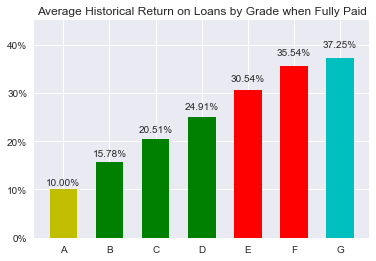

In [237]:
fig, ax = plt.subplots()
#rects1 = ax.bar([1,2,3,4,5,6,7], abc['75%'], alpha = 0.5, width = 0.5, align = 'edge'); #['A','B','C','D','E','F','G']
rects2 = ax.bar([1,2,3,4,5,6,7], efg['mean'], width =0.6, color = ['y','g','g','g','r','r','c']); #['A','B','C','D','E','F','G']

plt.xticks([1,2,3,4,5,6,7],('A', 'B', 'C', 'D', 'E', 'F', 'G'));
plt.yticks(range(0, 51, 10), [str(x) + "%" for x in range(0, 51, 10)])  ;
plt.title('Average Historical Return on Loans by Grade when Fully Paid');
#plt.xticks(fontsize=12)    
plt.ylim(0, 45)  ;
#plt.figure(figsize=(20,20));

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text((rect.get_x() + rect.get_width()/2.), 1.05*(height),
                '%2.2f' % float(height) + '%',  fontsize = 10, #color = 'green',
        ha='center', va='bottom')
autolabel(rects2);


plt.show();


In [240]:
abc = data[(data['issue_d'].dt.year >= 2007)&(data['issue_d'].dt.year <= 2014)].groupby('grade')['return_inv'].describe()

In [242]:
abc

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,71430.0,7.225784,13.299520,-99.432432,7.527427,10.283400,12.260943,25.071923
B,128088.0,9.701005,20.029075,-100.000000,9.895133,15.797615,19.004857,41.463158
C,108440.0,9.107053,27.307443,-100.000000,7.769682,19.721407,23.897467,50.210078
D,64782.0,8.096520,33.176934,-100.000000,2.322701,21.443306,29.480392,72.106730
E,29178.0,6.502445,39.488183,-100.000000,-22.259202,20.233498,34.936069,67.556111
F,11030.0,6.558417,43.826225,-100.000000,-29.812859,19.356472,40.657914,74.691930
G,2608.0,2.029098,46.494196,-100.000000,-40.800327,12.045704,40.621289,75.981903


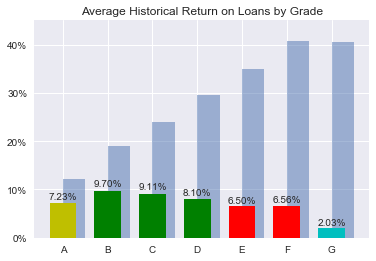

In [244]:
fig, ax = plt.subplots()
rects1 = ax.bar([1,2,3,4,5,6,7], abc['75%'], alpha = 0.5, width = 0.5, align = 'edge'); #['A','B','C','D','E','F','G']
rects2 = ax.bar([1,2,3,4,5,6,7], abc['mean'], width =0.6, color = ['y','g','g','g','r','r','c']); #['A','B','C','D','E','F','G']

plt.xticks([1,2,3,4,5,6,7],('A', 'B', 'C', 'D', 'E', 'F', 'G'));
plt.yticks(range(0, 51, 10), [str(x) + "%" for x in range(0, 51, 10)])  ;
plt.title('Average Historical Return on Loans by Grade');
#plt.xticks(fontsize=12)    
plt.ylim(0, 45)  ;
#plt.figure(figsize=(20,20));

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text((rect.get_x() + rect.get_width()/2.), 1.05*(height),
                '%2.2f' % float(height) + '%',  fontsize = 10, #color = 'green',
        ha='center', va='bottom')
autolabel(rects2);


plt.show();


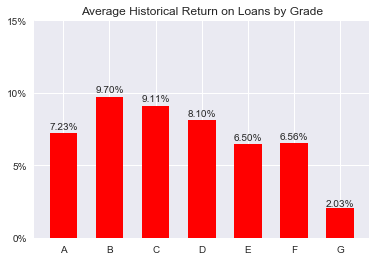

In [246]:
fig, ax = plt.subplots()
rects3 = ax.bar([1,2,3,4,5,6,7], abc['mean'], width =0.6, color = 'red'); #['A','B','C','D','E','F','G']

plt.xticks([1,2,3,4,5,6,7],('A', 'B', 'C', 'D', 'E', 'F', 'G'));
plt.yticks(range(0, 51, 5), [str(x) + "%" for x in range(0, 51, 5)])  
plt.title('Average Historical Return on Loans by Grade')
plt.ylim(0, 15)  
plt.xticks([1,2,3,4,5,6,7],('A', 'B', 'C', 'D', 'E', 'F', 'G'));
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text((rect.get_x() + rect.get_width()/2.), 1.02*(height),
                '%2.2f' % float(height) + '%',  fontsize = 10, 
        ha='center', va='bottom')
autolabel(rects3)
plt.show()

## FORMULA - EXPECTED RETURN

In [247]:
# Return Percentage - Ratio of Total Payment over the Funded Amount
data['ratio_inv'] = (data['total_pymnt_inv']/data['funded_amnt_inv'])*100

In [248]:
c = (data[(data['loan_status_num']== 1)].groupby(['grade','term'])['ratio_inv']).describe()

In [250]:
d = (data[(data['loan_status_num']== 0)].groupby(['grade','term'])['ratio_inv']).describe()

In [253]:
def exp_return(grade_num,term,p):
    if grade_num == 7 and term == 36:
        return (p*(((c['mean']['A'][0])/100)-1)) + ((1-p)*(((d['mean']['A'][0])/100)-1))
    elif grade_num == 7 and term == 60:
        return (p*(((c['mean']['A'][1])/100)-1)) + ((1-p)*(((d['mean']['A'][1])/100)-1))
    elif grade_num == 6 and term == 36:
        return (p*(((c['mean']['B'][0])/100)-1)) + ((1-p)*(((d['mean']['B'][0])/100)-1))
    elif grade_num == 6 and term == 60:
        return (p*(((c['mean']['B'][1])/100)-1)) + ((1-p)*(((d['mean']['B'][1])/100)-1))
    elif grade_num == 5 and term == 36:
        return (p*(((c['mean']['C'][0])/100)-1)) + ((1-p)*(((d['mean']['C'][0])/100)-1))
    elif grade_num == 5 and term == 60:
        return (p*(((c['mean']['C'][1])/100)-1)) + ((1-p)*(((d['mean']['C'][1])/100)-1))
    elif grade_num == 4 and term == 36:
        return (p*(((c['mean']['D'][0])/100)-1)) + ((1-p)*(((d['mean']['D'][0])/100)-1))
    elif grade_num == 4 and term == 60:
        return (p*(((c['mean']['D'][1])/100)-1)) + ((1-p)*(((d['mean']['D'][1])/100)-1))
    elif grade_num == 3 and term == 36:
        return (p*(((c['mean']['E'][0])/100)-1)) + ((1-p)*(((d['mean']['E'][0])/100)-1))
    elif grade_num == 3 and term == 60:
        return (p*(((c['mean']['E'][1])/100)-1)) + ((1-p)*(((d['mean']['E'][1])/100)-1))
    elif grade_num == 2 and term == 36:
        return (p*(((c['mean']['F'][0])/100)-1)) + ((1-p)*(((d['mean']['F'][0])/100)-1))
    elif grade_num == 2 and term == 60:
        return (p*(((c['mean']['F'][1])/100)-1)) + ((1-p)*(((d['mean']['F'][1])/100)-1))
    elif grade_num == 1 and term == 36:
        return (p*(((c['mean']['G'][0])/100)-1)) + ((1-p)*(((d['mean']['G'][0])/100)-1))
    else: #grade_num == 1 and term == 60:
        return (p*(((c['mean']['G'][1])/100)-1)) + ((1-p)*(((d['mean']['G'][1])/100)-1))

In [273]:
#Grade A
p = logreg.predict_proba([1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
p= p[0][1]
print p

0.95690304967


/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



In [274]:
(exp_return(6,36,p))

0.11532379357024183